In [39]:
import numpy as np
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
images = mnist.load_data()

In [3]:
train_images = images[0][0]
train_labels = images[0][1]
test_images = images[1][0]
test_labels = images[1][1]

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) 
print(test_images.shape)  

(60000, 784)
(10000, 784)


### Построение модели - исходные настройки

In [6]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [7]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [8]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 1s 612us/step - loss: 0.3614 - accuracy: 0.8900
Epoch 2/5
1875/1875 [==============================] - 1s 615us/step - loss: 0.1842 - accuracy: 0.9435
Epoch 3/5
1875/1875 [==============================] - 1s 636us/step - loss: 0.1422 - accuracy: 0.9557
Epoch 4/5
1875/1875 [==============================] - 1s 623us/step - loss: 0.1181 - accuracy: 0.9628
Epoch 5/5
1875/1875 [==============================] - 1s 607us/step - loss: 0.1038 - accuracy: 0.9671


In [9]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 371us/step - loss: 0.1123 - accuracy: 0.9633


[0.11233797669410706, 0.9632999897003174]

In [10]:
predictions = model.predict(test_images[:5])

In [11]:
print(np.argmax(predictions, axis=1))

[7 2 1 0 4]


In [12]:
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]


### Построение модели - увеличим кол-во нейронов на внутренеем слое

In [13]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax'),
])

In [14]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [15]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 1s 693us/step - loss: 0.3221 - accuracy: 0.9027
Epoch 2/5
1875/1875 [==============================] - 1s 692us/step - loss: 0.1562 - accuracy: 0.9519
Epoch 3/5
1875/1875 [==============================] - 1s 694us/step - loss: 0.1212 - accuracy: 0.9625
Epoch 4/5
1875/1875 [==============================] - 1s 704us/step - loss: 0.1009 - accuracy: 0.9679
Epoch 5/5
1875/1875 [==============================] - 1s 701us/step - loss: 0.0881 - accuracy: 0.9717


*Увеличиение количества нейронов увеличило точности модели*

In [16]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 419us/step - loss: 0.1182 - accuracy: 0.9644


[0.11819637566804886, 0.9643999934196472]

*На тестовой выборке прирост незначительный*

In [17]:
predictions = model.predict(test_images[:5])

In [18]:
print(np.argmax(predictions, axis=1))

[7 2 1 0 4]


In [19]:
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]


### Построение модели - увеличим кол-во нейронов на внешнем слое

In [20]:
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax'),
])

In [21]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [22]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 2s 800us/step - loss: 0.2973 - accuracy: 0.9078
Epoch 2/5
1875/1875 [==============================] - 2s 802us/step - loss: 0.1431 - accuracy: 0.9555
Epoch 3/5
1875/1875 [==============================] - 2s 802us/step - loss: 0.1087 - accuracy: 0.9655
Epoch 4/5
1875/1875 [==============================] - 2s 804us/step - loss: 0.0902 - accuracy: 0.9709
Epoch 5/5
1875/1875 [==============================] - 2s 806us/step - loss: 0.0779 - accuracy: 0.9747


In [23]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 412us/step - loss: 0.1026 - accuracy: 0.9700


[0.1026071310043335, 0.9700000286102295]

*Фиксируем прирост точности с первых эпох обучения*

In [24]:
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis=1))
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


### Построение модели - увеличим кол-во эпох

In [25]:
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax'),
])

In [26]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [27]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=35,
  batch_size=32,
)

Epoch 1/35
1875/1875 [==============================] - 2s 820us/step - loss: 0.3014 - accuracy: 0.9078
Epoch 2/35
1875/1875 [==============================] - 2s 822us/step - loss: 0.1440 - accuracy: 0.9561
Epoch 3/35
1875/1875 [==============================] - 2s 819us/step - loss: 0.1097 - accuracy: 0.9653
Epoch 4/35
1875/1875 [==============================] - 2s 822us/step - loss: 0.0901 - accuracy: 0.9714
Epoch 5/35
1875/1875 [==============================] - 2s 851us/step - loss: 0.0766 - accuracy: 0.9754
Epoch 6/35
1875/1875 [==============================] - 2s 852us/step - loss: 0.0694 - accuracy: 0.9774
Epoch 7/35
1875/1875 [==============================] - 2s 839us/step - loss: 0.0606 - accuracy: 0.9804
Epoch 8/35
1875/1875 [==============================] - 1s 799us/step - loss: 0.0542 - accuracy: 0.9822
Epoch 9/35
1875/1875 [==============================] - 2s 802us/step - loss: 0.0487 - accuracy: 0.9836
Epoch 10/35
1875/1875 [==============================] - 1s 798u

In [28]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 425us/step - loss: 0.1561 - accuracy: 0.9768


[0.1560676395893097, 0.9768000245094299]

In [29]:
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis=1))
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


*Точность около 0.99 фиксировалась уже на 16 эпохе обучения*

### Построение модели - изменим batch_size и посмотри насколько быстрее достигнем результата 0.99

In [52]:
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax'),
])

In [53]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [54]:
history = model.fit(
  train_images,
  to_categorical(train_labels),
  validation_split=0.25,
  epochs=35,
  batch_size=100,
  verbose=0
)

Epoch 1/35
450/450 [==============================] - 1s 1ms/step - loss: 0.4072 - accuracy: 0.8797 - val_loss: 0.2553 - val_accuracy: 0.9210
Epoch 2/35
450/450 [==============================] - 1s 1ms/step - loss: 0.1889 - accuracy: 0.9437 - val_loss: 0.1538 - val_accuracy: 0.9536
Epoch 3/35
450/450 [==============================] - 1s 1ms/step - loss: 0.1331 - accuracy: 0.9596 - val_loss: 0.1368 - val_accuracy: 0.9604
Epoch 4/35
450/450 [==============================] - 1s 1ms/step - loss: 0.1044 - accuracy: 0.9679 - val_loss: 0.1264 - val_accuracy: 0.9603
Epoch 5/35
450/450 [==============================] - 1s 1ms/step - loss: 0.0909 - accuracy: 0.9717 - val_loss: 0.1140 - val_accuracy: 0.9669
Epoch 6/35
450/450 [==============================] - 1s 1ms/step - loss: 0.0759 - accuracy: 0.9758 - val_loss: 0.1066 - val_accuracy: 0.9685
Epoch 7/35
450/450 [==============================] - 1s 1ms/step - loss: 0.0672 - accuracy: 0.9782 - val_loss: 0.1001 - val_accuracy: 0.9707
Epoch 

In [55]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 604us/step - loss: 0.1518 - accuracy: 0.9717


[0.15183505415916443, 0.9717000126838684]

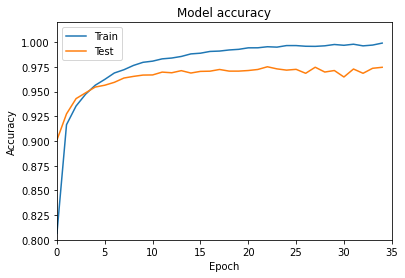

In [73]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')

plt.axis((0, 35, 0.8 ,1.02))

plt.show()

### Построение модели - попробуем иные функции активации и потерь: sigmoid вместо relu

In [60]:
model = Sequential([
  Dense(128, activation='sigmoid', input_shape=(784,)),
  Dense(256, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

In [61]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [62]:
history = model.fit(
  train_images,
  to_categorical(train_labels),
  validation_split=0.25,
  epochs=35,
  batch_size=100,
  verbose=0  
)

In [63]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 620us/step - loss: 0.0967 - accuracy: 0.9767


[0.0966586321592331, 0.9767000079154968]

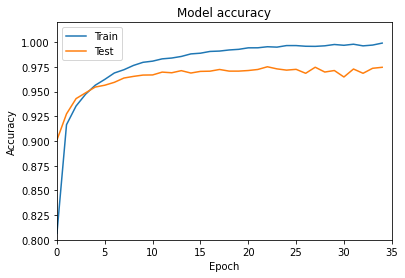

In [72]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')

plt.axis((0, 35, 0.8 ,1.02))

plt.show()

### Построение модели - попробуем иные функции активации и потерь: sigmoid вместо relu

In [109]:
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax'),
])

In [110]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [111]:
history = model.fit(
  train_images,
  to_categorical(train_labels),
  validation_split=0.25,
  epochs=35,
  batch_size=100,
  verbose=0  
)

In [112]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 623us/step - loss: 0.0178 - accuracy: 0.9778


[0.017788033932447433, 0.9778000116348267]

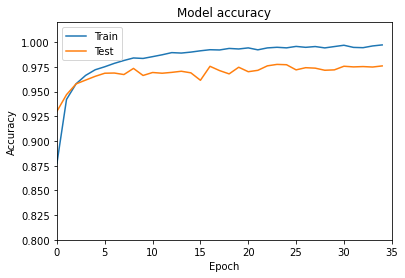

In [113]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')

plt.axis((0, 35, 0.8 ,1.02))

plt.show()